# Part 1 - Create model for binary classification of normal and abnormal heartbeats


In [38]:
##imports for reading dataframes and splitting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#More metrics for models
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

##read dataframes
normal = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cardio_2/ptbdb_normal.csv', header=None)
abnormal = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cardio_2/ptbdb_abnormal.csv', header=None)

**Concatenate normal and abnormal data, train/test split**

In [18]:
##concatenate dataframes
task_1 = pd.concat([normal, abnormal], axis =0, ignore_index=True)
task_1 = task_1.rename(columns={187: 'Label'})

print(task_1.columns)

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           178,     179,     180,     181,     182,     183,     184,     185,
           186, 'Label'],
      dtype='object', length=188)


In [19]:
Y_col = 'Label'
x = task_1.loc[:, task_1.columns != Y_col].columns

##split train and test, separating the label column (intended output)
X_train, X_test, y_train, y_test = train_test_split(task_1[x], task_1[Y_col],test_size=0.3, random_state=42)


In [20]:
X_train.shape

(10186, 187)

In [21]:
# print(m_train.columns)
# print(m_test.columns)


**Logistic regression model**

In [22]:
#imports for neural network
import torch
from sklearn.preprocessing import LabelEncoder
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.optim as optim
import tqdm
import copy

#Imports for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
# Loop executed to determine random state that yields the best accuracy
i = 0
maxAcc = 0
bestState = 0
while i < 100:
  reg = LogisticRegression(random_state=i, solver='lbfgs', max_iter=1000)
  reg = reg.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  if acc > maxAcc:
    maxAcc = acc
    bestState = i
  i += 1

In [39]:
# Logistic regression model using best random state -> 82.04% accurate
reg = LogisticRegression(random_state=bestState, solver='lbfgs', max_iter=1000)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print('accuracy: ', acc)
print('precision: %.2f' % precision_score(y_test, y_pred,average='weighted'))
print('recall: %.2f' % recall_score(y_test, y_pred,average='weighted'))
print('f1_score: %.2f' % f1_score(y_test, y_pred,average='weighted'))

accuracy:  0.8365384615384616
precision: 0.83
recall: 0.84
f1_score: 0.83


In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#Preprocesses data using StandardScaler class to ensure fits model
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_
scaler.scale_
X_scaled = scaler.transform(X_train)
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)
print(score)

0.8273018781493358


In [26]:
i = 0.10
maxTesting = 0
bestAcc = 0
while i < 0.36:
  X_train, X_test, y_train, y_test = train_test_split(task_1[x], task_1[Y_col],test_size=i, random_state=42)
  reg = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
  reg = reg.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  if acc > bestAcc:
    bestAcc = acc
    maxTesting = i
  i += 0.01

In [41]:
# Logistic regression model using best testing proportion -> 83.65% accurate
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(task_1[x], task_1[Y_col],test_size=maxTesting, random_state=42)

reg = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
reg = reg.fit(X_train_two, y_train_two)
y_pred = reg.predict(X_test_two)
testingAcc = accuracy_score(y_test_two, y_pred)

print(maxTesting)

print('accuracy: ', testingAcc)
print('precision: %.4f' % precision_score(y_test, y_pred,average='weighted'))
print('recall: %.4f' % recall_score(y_test, y_pred,average='weighted'))
print('f1_score: %.4f' % f1_score(y_test, y_pred,average='weighted'))

0.1
accuracy:  0.8365384615384616
precision: 0.8306
recall: 0.8365
f1_score: 0.8316


In [36]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix for logistic regression:")
print(cm)

Confusion matrix for logistic regression:
[[ 359   29]
 [  11 1057]]


In [29]:
print("Logistic Regression model accuracy with Random State 0:", acc*100)
print("Logistic Regression model accuracy with preprocessing:", score*100)
print("Logistic Regression model accuracy with testing size 0.1:", testingAcc*100)

Logistic Regression model accuracy with Random State 0: 82.25363172359638
Logistic Regression model accuracy with preprocessing: 82.73018781493357
Logistic Regression model accuracy with testing size 0.1: 83.65384615384616




**Random Forests**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(task_1[x], task_1[Y_col],test_size=0.10, random_state=42)

#imports for RandomForest
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators=100, random_state=42)
randomForest.fit(X_train, y_train)
y_pred = randomForest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random forest model accuracy: {accuracy}")

print('accuracy: ', accuracy)
print('precision: %.4f' % precision_score(y_test, y_pred,average='weighted'))
print('recall: %.4f' % recall_score(y_test, y_pred,average='weighted'))
print('f1_score: %.4f' % f1_score(y_test, y_pred,average='weighted'))

Random forest model accuracy: 0.9725274725274725
accuracy:  0.9725274725274725
precision: 0.9725
recall: 0.9725
f1_score: 0.9723


**Neural networks**

In [31]:
#imports for neural networks
import tensorflow as tf

In [32]:
X_train, X_test, y_train, y_test = train_test_split(task_1[x], task_1[Y_col],test_size=0.10, random_state=42)

#Change data and labels to TF tensors - 1D tensor constants
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test)

In [45]:
# Create the model
model = tf.keras.Sequential([
                  tf.keras.layers.Dense(128, activation="relu"),
                  tf.keras.layers.Dense(256, activation="relu"),
                  tf.keras.layers.Dense(128, activation="relu"),
                  tf.keras.layers.Dense(1, activation="sigmoid")
 ])

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
model.evaluate(X_test, y_test)

46/46 [==============================] - 0s 3ms/step - loss: 0.1245 - accuracy: 0.9718


[0.12448064237833023, 0.9718406796455383]

In [48]:
model.summary()

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1_score)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               24064     
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 90113 (352.00 KB)
Trainable params: 90113 (352.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Accuracy: 0.971841
Precision: 0.985160
Recall: 0.976381
F1 score: 0.980284


Our model has 90113 neurons and 97.60% accuracy. It uses ReLU activation function, binary crossentropy loss function, and Adam optimizer.

# Results: Models and Accuracies:


*   Logistic Regression w/ preprocessing

Accuracy: 82.73%
*   Logistic Regression

Accuracy: 83.65%
*   Random Forest

Accuracy: 97.25%
*   **Neural network**

**Accuracy: 97.60%**




Label
1.0    10506
0.0     4046
Name: count, dtype: int64


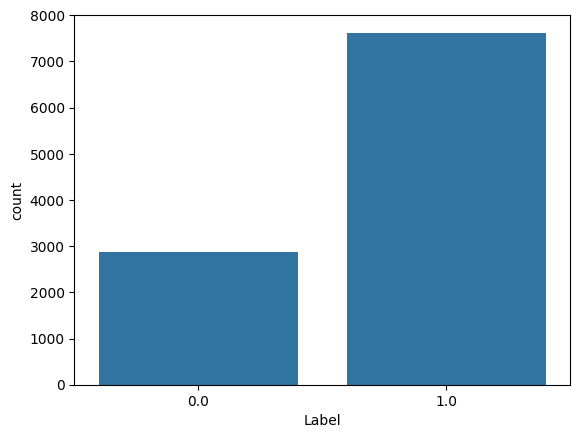

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label', data=task_1)
print(task_1['Label'].value_counts())


Some class imbalance - address by undersampling abnormal?